<a href="https://colab.research.google.com/github/Nguyen-Ngoc-Nhi/Climate-Analysis/blob/main/test_with_1_year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Test something with Data

In [2]:
import pandas as pd

# Load the CSV file
file_path = '/content/drive/MyDrive/B3 - Data Science Gen 13/Fund of Data Science/Project/hanoi 2022-09-29 to 2023-09-28.csv'
data = pd.read_csv(file_path)

# Inspect the first few rows
print(data.head())

# Check the column names and data types
print(data.info())


    name    datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  hanoi  2022-09-29     29.0     24.0  26.1          33.6          24.0   
1  hanoi  2022-09-30     31.5     25.0  26.6          37.2          25.0   
2  hanoi  2022-10-01     29.0     25.0  26.2          33.6          25.0   
3  hanoi  2022-10-02     29.5     25.0  26.9          34.4          25.0   
4  hanoi  2022-10-03     32.5     25.0  27.8          38.6          25.0   

   feelslike   dew  humidity  ...  solarenergy  uvindex  severerisk  \
0       27.0  23.7      86.9  ...          4.2        4          10   
1       27.8  23.6      84.1  ...          7.6        4          10   
2       27.3  24.3      89.2  ...         10.2        7          10   
3       28.9  23.8      83.4  ...          3.0        2          10   
4       30.3  24.0      81.1  ...         20.5        9          30   

               sunrise               sunset  moonphase  \
0  2022-09-29T05:47:01  2022-09-29T17:46:47       0.12   


Pre-processing

In [3]:
# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values
data.fillna(method='ffill', inplace=True)  # Forward fill missing values
# Alternatively, you can drop rows with missing values
data.dropna(inplace=True)


name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          109
snow                  0
snowdepth             0
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk            0
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
dtype: int64


<ipython-input-3-8ac54df62ea6>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill missing values


In [6]:
# Convert date column to datetime format if not already
data['datetime'] = pd.to_datetime(data['datetime'])

# Set the date column as the index
data.set_index('datetime', inplace=True)


EDA

In [5]:
# Summary statistics
print(data.describe())


          tempmax     tempmin        temp  feelslikemax  feelslikemin  \
count  365.000000  365.000000  365.000000    365.000000    365.000000   
mean    28.708219   21.885479   24.965205     32.852329     22.712329   
std      5.729031    4.891626    4.968469      9.604410      6.062453   
min     14.000000    7.000000   12.700000     14.000000      5.200000   
25%     23.800000   18.000000   20.800000     23.800000     18.000000   
50%     29.500000   23.000000   25.900000     32.600000     23.000000   
75%     33.500000   26.000000   28.900000     42.100000     26.000000   
max     39.300000   29.000000   33.200000     51.600000     36.800000   

        feelslike         dew    humidity      precip  precipprob  ...  \
count  365.000000  365.000000  365.000000  365.000000  365.000000  ...   
mean    27.493151   20.169315   76.545479    3.934948   69.041096  ...   
std      7.652561    6.210103   11.267846   13.198290   46.295883  ...   
min     12.700000   -1.100000   31.100000    0

Visualize

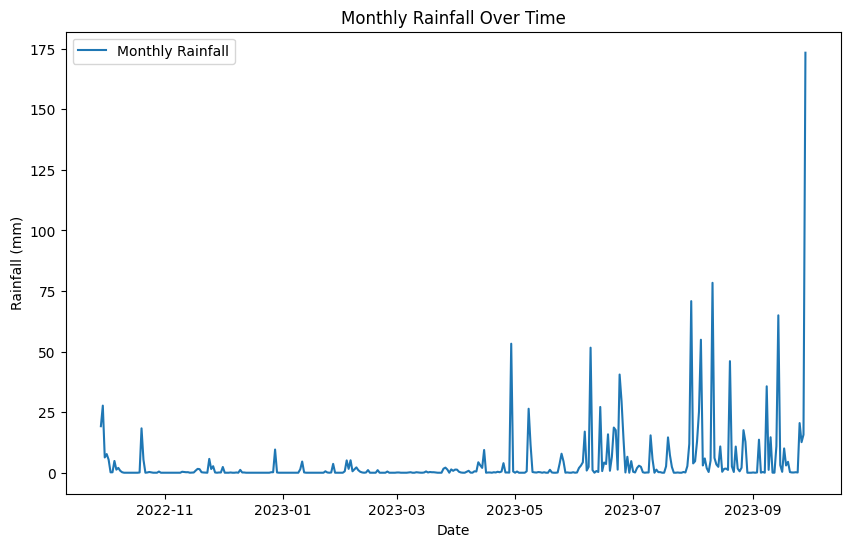

In [8]:
import matplotlib.pyplot as plt

# Plot rainfall data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['precip'], label='Monthly Rainfall')
plt.title('Monthly Rainfall Over Time')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()


Feature engineering

In [10]:
# Create lag features (e.g., previous month's rainfall)
data['Rainfall_Lag1'] = data['precip'].shift(1)

# Create moving averages
data['Rainfall_MA3'] = data['precip'].rolling(window=3).mean()


ARIMA

In [11]:
from statsmodels.tsa.arima_model import ARIMA

# Fit ARIMA model
model = ARIMA(data['precip'].dropna(), order=(5,1,0))  # Replace (5,1,0) with optimal values
model_fit = model.fit(disp=0)

# Make predictions
forecast = model_fit.forecast(steps=12)[0]  # Predict next 12 months
print(forecast)


NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


ML

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Prepare data for machine learning
X = data[['temp', 'humidity', 'windspeed']]  # Example features
y = data['precip']  # Target variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
predictions = rf_model.predict(X_test)


In [13]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 24.662784597251452


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


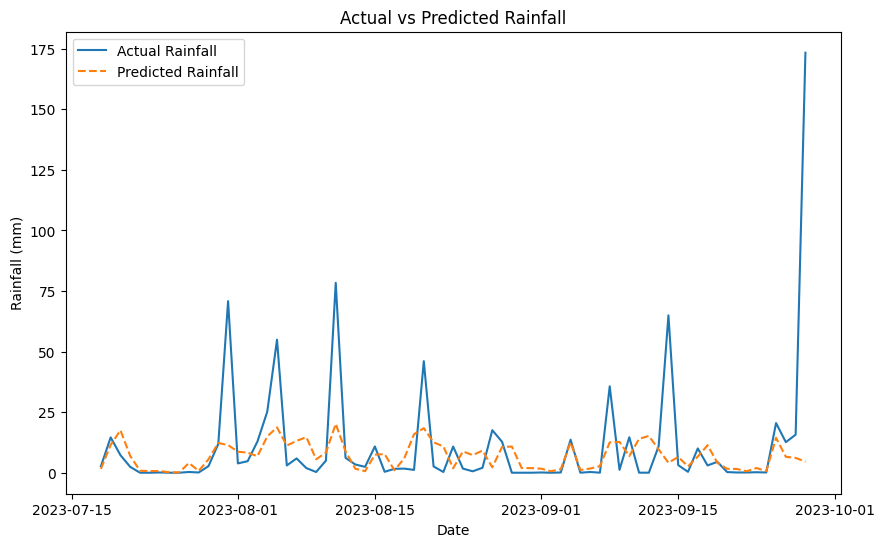

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Rainfall')
plt.plot(data.index[-len(y_test):], predictions, label='Predicted Rainfall', linestyle='--')
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()


# DATA

## Date and Location Information:

City name: Hanoi

Weather Measurements:
- *datetime*: Date of the observation
- Temperature: *tempmax*, *tempmin*, *temp*, *feelslikemax*, *feelslikemin*, *feelslike*
- Humidity and Dew Point: *humidity*, *dew*
- Precipitation: *precip*, *precipprob*, *precipcover*, *preciptype* \(rainfall-related columns: the amount of rain, type of precipitation)
- Wind: *windgust*, *windspeed*, *winddir*
- Pressure: *sealevelpressure*
- Cloud and Visibility: *cloudcover*, *visibility*
- Solar and UV Radiation: *solarradiation*, *solarenergy*, *uvindex*
- Sunrise/Sunset and Moon Phase:
*sunrise*, *sunset*, *moonphase*

Other Columns:
- *conditions*, *description*
- *stations*: Weather station codes

## Analysis Areas
1. Temperature Trends: Analyze daily/ monthly/ seasonal temperature changes (*tempmax*, *tempmin*, *temp*)
2. Rainfall and Precipitation Patterns
  - *precip*, *precipprob*, *precipcover*
  - Explore relationships between rainfall and other factors like temperature, humidity, or wind
3. Wind and Pressure Analysis: examine (*windgust*, *windspeed*, *winddir*) and how they relate to weather conditions
4. Solar Energy and UV Index: (*solarradiation*, *solarenergy*) and UV index trends
5. Seasonal Patterns: analyze seasonal effects (*sunrise*, *sunset*, *moonphase*) and how they correlate with other variables

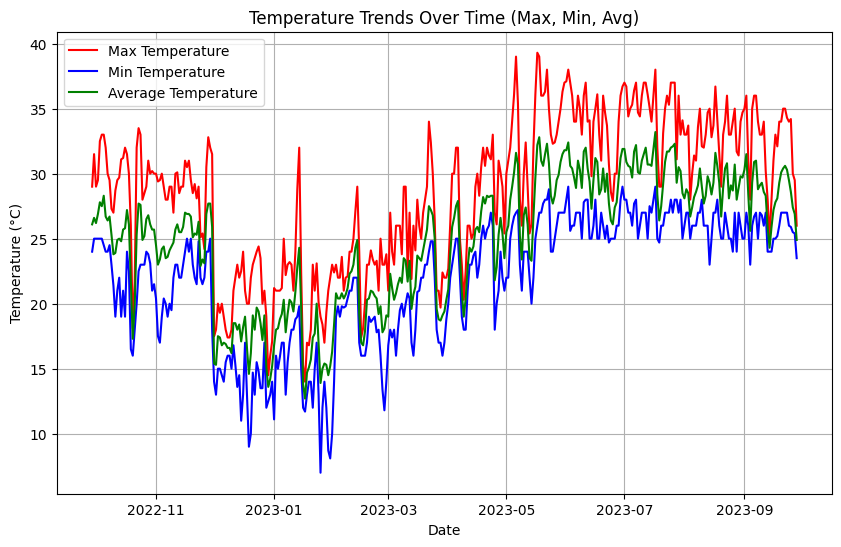

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '/content/drive/MyDrive/B3 - Data Science Gen 13/Fund of Data Science/Project/hanoi 2022-09-29 to 2023-09-28.csv'
data = pd.read_csv(file_path)

# Ensure 'datetime' is in datetime format and set as index
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)

# Key Analysis 1: Temperature Trends over Time (TempMax, TempMin, Temp)
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['tempmax'], label='Max Temperature', color='red')
plt.plot(data.index, data['tempmin'], label='Min Temperature', color='blue')
plt.plot(data.index, data['temp'], label='Average Temperature', color='green')
plt.title('Temperature Trends Over Time (Max, Min, Avg)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


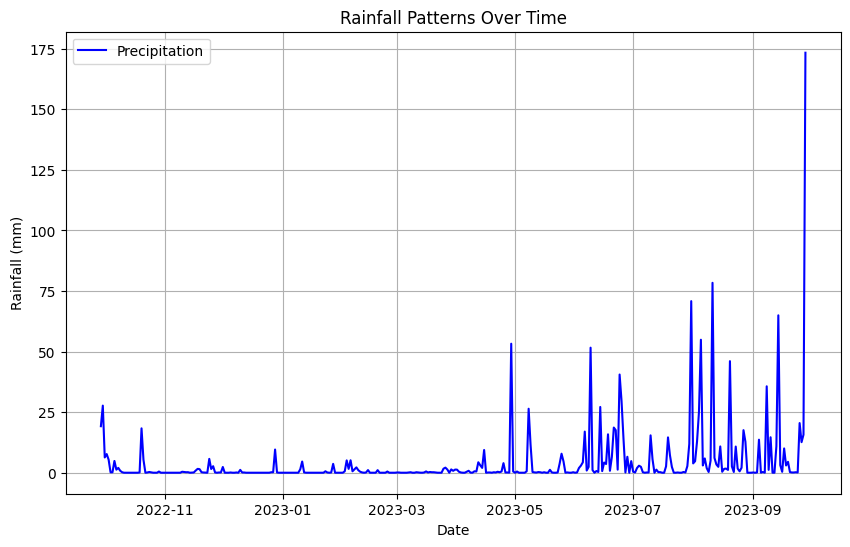

In [18]:
# Key Analysis 2: Rainfall and Precipitation Patterns
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['precip'], label='Precipitation', color='blue')
plt.title('Rainfall Patterns Over Time')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()

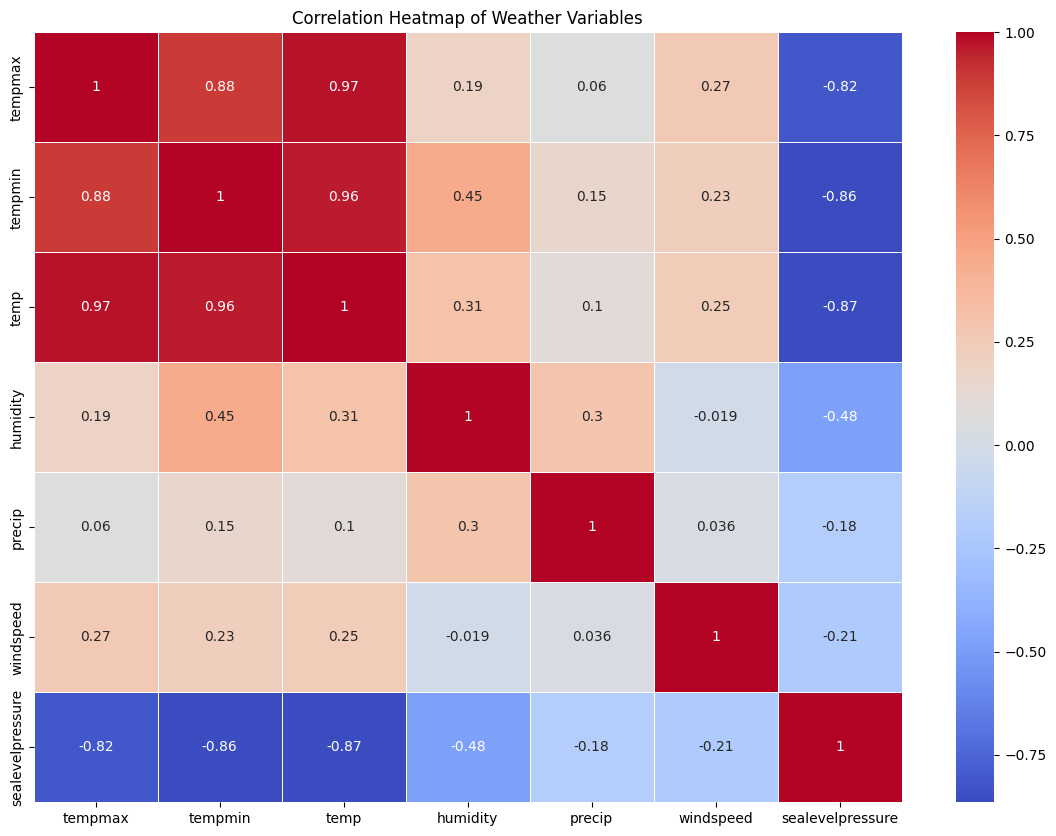

In [19]:
# Key Analysis 3: Correlation Heatmap for all Variables
plt.figure(figsize=(14, 10))
correlation_matrix = data[['tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'windspeed', 'sealevelpressure']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Weather Variables')
plt.show()